In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
C1_color = '#ffae42'
C1_outline = '#f58c00'

C2_color = '#4293ff'
C2_outline = '#0069f5'

reg_color = '#ff4293'
DPI = 300

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    # comment the following line for full-length
    # ax.set_ylim(0, 1.1)
    
def set_class_colors(parts):
    parts['bodies'][0].set_facecolor(C1_color)
    parts['bodies'][0].set_edgecolor(C1_outline)
    parts['bodies'][0].set_alpha(1)
    parts['bodies'][1].set_facecolor(C2_color)
    parts['bodies'][1].set_edgecolor(C2_outline)
    parts['bodies'][1].set_alpha(1)

In [3]:
filepath = 'data/GOAt_CV.txt'

import pandas as pd
df=pd.read_csv(filepath, sep='\t')
vals = df.values

In [4]:
classes = np.delete(vals,[1,2,3],axis=1).ravel()
WsCV = np.delete(vals,[0,2,3],axis=1).ravel()
C24CV = np.delete(vals,[0,1,3],axis=1).ravel()
WaCV = np.delete(vals,[0,1,2],axis=1).ravel()

def trunc_to_1(a):
    return np.array([num if num <= 1.0 else 1.0 for num in a])

outlier_threshold=10.

Ws_I = sorted(np.array([WsCV[i] for i in range(len(classes)) if (classes[i] == 'I' and WsCV[i] < outlier_threshold)]))
Ws_II = sorted(np.array([WsCV[i] for i in range(len(classes)) if (classes[i] == 'II' and WsCV[i] < outlier_threshold)]))

C24_I = sorted(np.array([C24CV[i] for i in range(len(classes)) if (classes[i] == 'I' and C24CV[i] < outlier_threshold)]))
C24_II = sorted(np.array([C24CV[i] for i in range(len(classes)) if (classes[i] == 'II' and C24CV[i] < outlier_threshold)]))

Wa_I = sorted(np.array([WaCV[i] for i in range(len(classes)) if (classes[i] == 'I' and WaCV[i] < outlier_threshold)]))
Wa_II = sorted(np.array([WaCV[i] for i in range(len(classes)) if (classes[i] == 'II' and WaCV[i] < outlier_threshold)]))

In [5]:
print("Total counts:")
print("Ws_I:\t{}".format(len(Ws_I)))
print("Ws_II:\t{}".format(len(Ws_II)))

print("C24_I:\t{}".format(len(C24_I)))
print("C24_II:\t{}".format(len(C24_II)))

print("Wa_I:\t{}".format(len(Wa_I)))
print("Wa_II:\t{}".format(len(Wa_II)))

Total counts:
Ws_I:	392
Ws_II:	436
C24_I:	392
C24_II:	436
Wa_I:	392
Wa_II:	436


In [6]:
# create test data
np.random.seed(19680801)
data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]

Ws = [Ws_I, Ws_II]
C24 = [C24_I, C24_II]
Wa = [Wa_I, Wa_II]

outliers = {
    "Ws_I" : [val for val in Ws_I if val > 2.0],
    "Ws_II" : [val for val in Ws_II if val > 2.0],
    "C24_I" : [val for val in C24_I if val > 2.0],
    "C24_II" : [val for val in C24_II if val > 2.0],
    "Wa_I" : [val for val in Wa_I if val > 2.0],
    "Wa_II" : [val for val in Wa_II if val > 2.0],
}

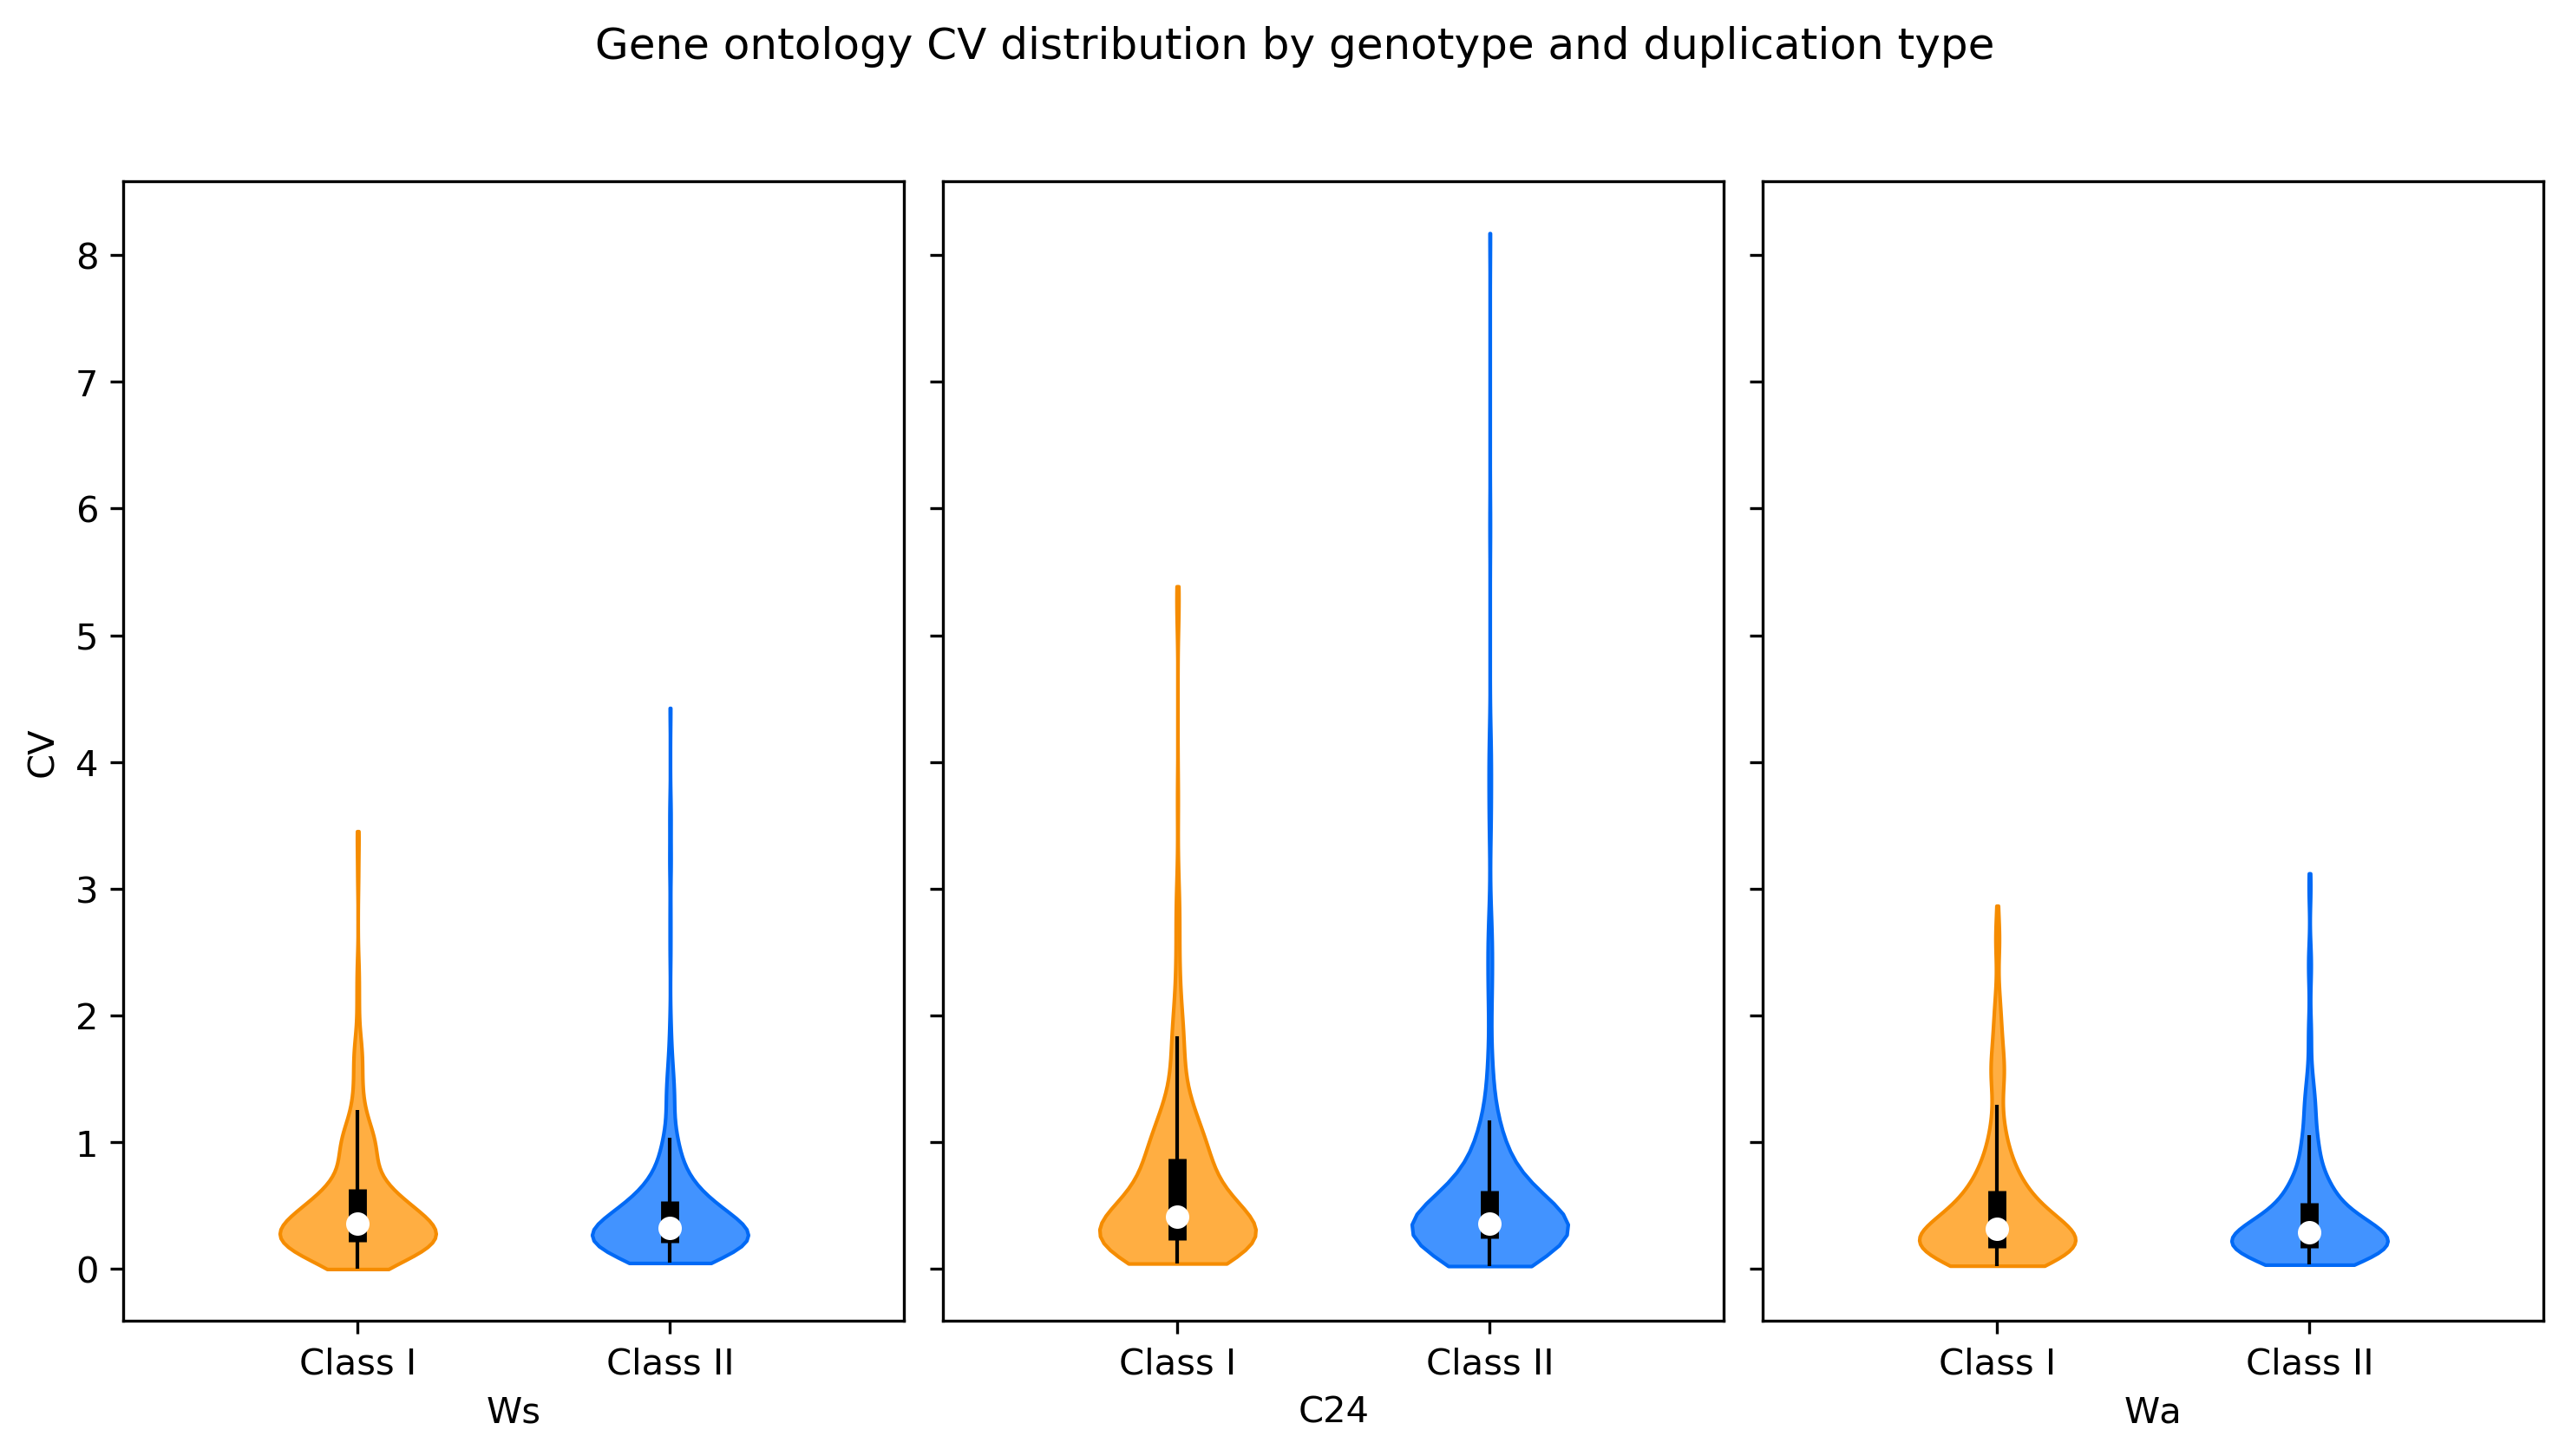

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,6), dpi=DPI, sharey=True)

def label_diff(ax,text,X,Y):
    x = (X[i]+X[j])/2
    y = 1.1*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])

    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':20,'shrinkB':20,'linewidth':2}
    ax.annotate(text, xy=(X[i],y+7), zorder=10)
    ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)

#ax1.set_title('Ws')
ax1.set_ylabel('CV')

# for (label, ax) in zip(['Ws','C24','Wa'], [ax1, ax2, ax3]):
parts = ax1.violinplot(
        Ws, showmeans=False, showmedians=False,
        showextrema=False)
ax1.set_xlabel('Ws')
set_class_colors(parts)

#ax2.set_title('C24')
parts = ax2.violinplot(
        C24, showmeans=False, showmedians=False,
        showextrema=False)
ax2.set_xlabel('C24')
set_class_colors(parts)

#ax3.set_title('Wa')
parts = ax3.violinplot(
        Wa, showmeans=False, showmedians=False,
        showextrema=False)
ax3.set_xlabel('Wa')
set_class_colors(parts)


for (p, d) in zip([ax1, ax2, ax3],[Ws, C24, Wa]):
    for thing in d:
        quartile1, medians, quartile3 = np.percentile(thing, [25, 50, 75])
        whiskers = np.array([
            adjacent_values(thing, quartile1, quartile3)])
        whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

        inds = np.arange(d.index(thing)+1, d.index(thing)+2)
        p.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
        p.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
        p.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)

# set style for the axes
labels = ['Class I', 'Class II']
for ax in [ax1, ax2, ax3]:
    set_axis_style(ax, labels)

fig.suptitle("Gene ontology CV distribution by genotype and duplication type")
# fig.text(0.95, 0.05, 'Potter, Song, Doyle, and Coate',
#         fontsize=50, color='gray',
#         ha='right', va='bottom', alpha=0.5)
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.savefig('figures/GO_violin_truncated.png')

In [9]:
ws_file = 'data/Ws_PRV_GO.txt'
c24_file = 'data/C24_PRV_GO.txt'
wa_file = 'data/Wa_PRV_GO.txt'

df_ws=pd.read_csv(ws_file, sep='\t')
df_c24=pd.read_csv(c24_file, sep='\t')
df_wa=pd.read_csv(wa_file, sep='\t')

vals_ws = df_ws.values
vals_c24 = df_c24.values
vals_wa = df_wa.values

In [10]:
classes_ws = np.delete(vals_ws,[1],axis=1).ravel()
classes_c24 = np.delete(vals_c24,[1],axis=1).ravel()
classes_wa = np.delete(vals_wa,[1],axis=1).ravel()

cv_ws = np.delete(vals_ws,[0],axis=1).ravel()
cv_c24 = np.delete(vals_c24,[0],axis=1).ravel()
cv_wa = np.delete(vals_wa,[0],axis=1).ravel()

In [11]:
Ws_I = sorted(np.array([cv_ws[i] for i in range(len(classes_ws)) if (classes_ws[i] == 'I' and cv_ws[i] < outlier_threshold)]))
Ws_II = sorted(np.array([cv_ws[i] for i in range(len(classes_ws)) if (classes_ws[i] == 'II' and cv_ws[i] < outlier_threshold)]))

C24_I = sorted(np.array([cv_c24[i] for i in range(len(classes_c24)) if (classes_c24[i] == 'I' and cv_c24[i] < outlier_threshold)]))
C24_II = sorted(np.array([cv_c24[i] for i in range(len(classes_c24)) if (classes_c24[i] == 'II' and cv_c24[i] < outlier_threshold)]))

Wa_I = sorted(np.array([cv_wa[i] for i in range(len(classes_wa)) if (classes_wa[i] == 'I' and cv_wa[i] < outlier_threshold)]))
Wa_II = sorted(np.array([cv_wa[i] for i in range(len(classes_wa)) if (classes_wa[i] == 'II' and cv_wa[i] < outlier_threshold)]))

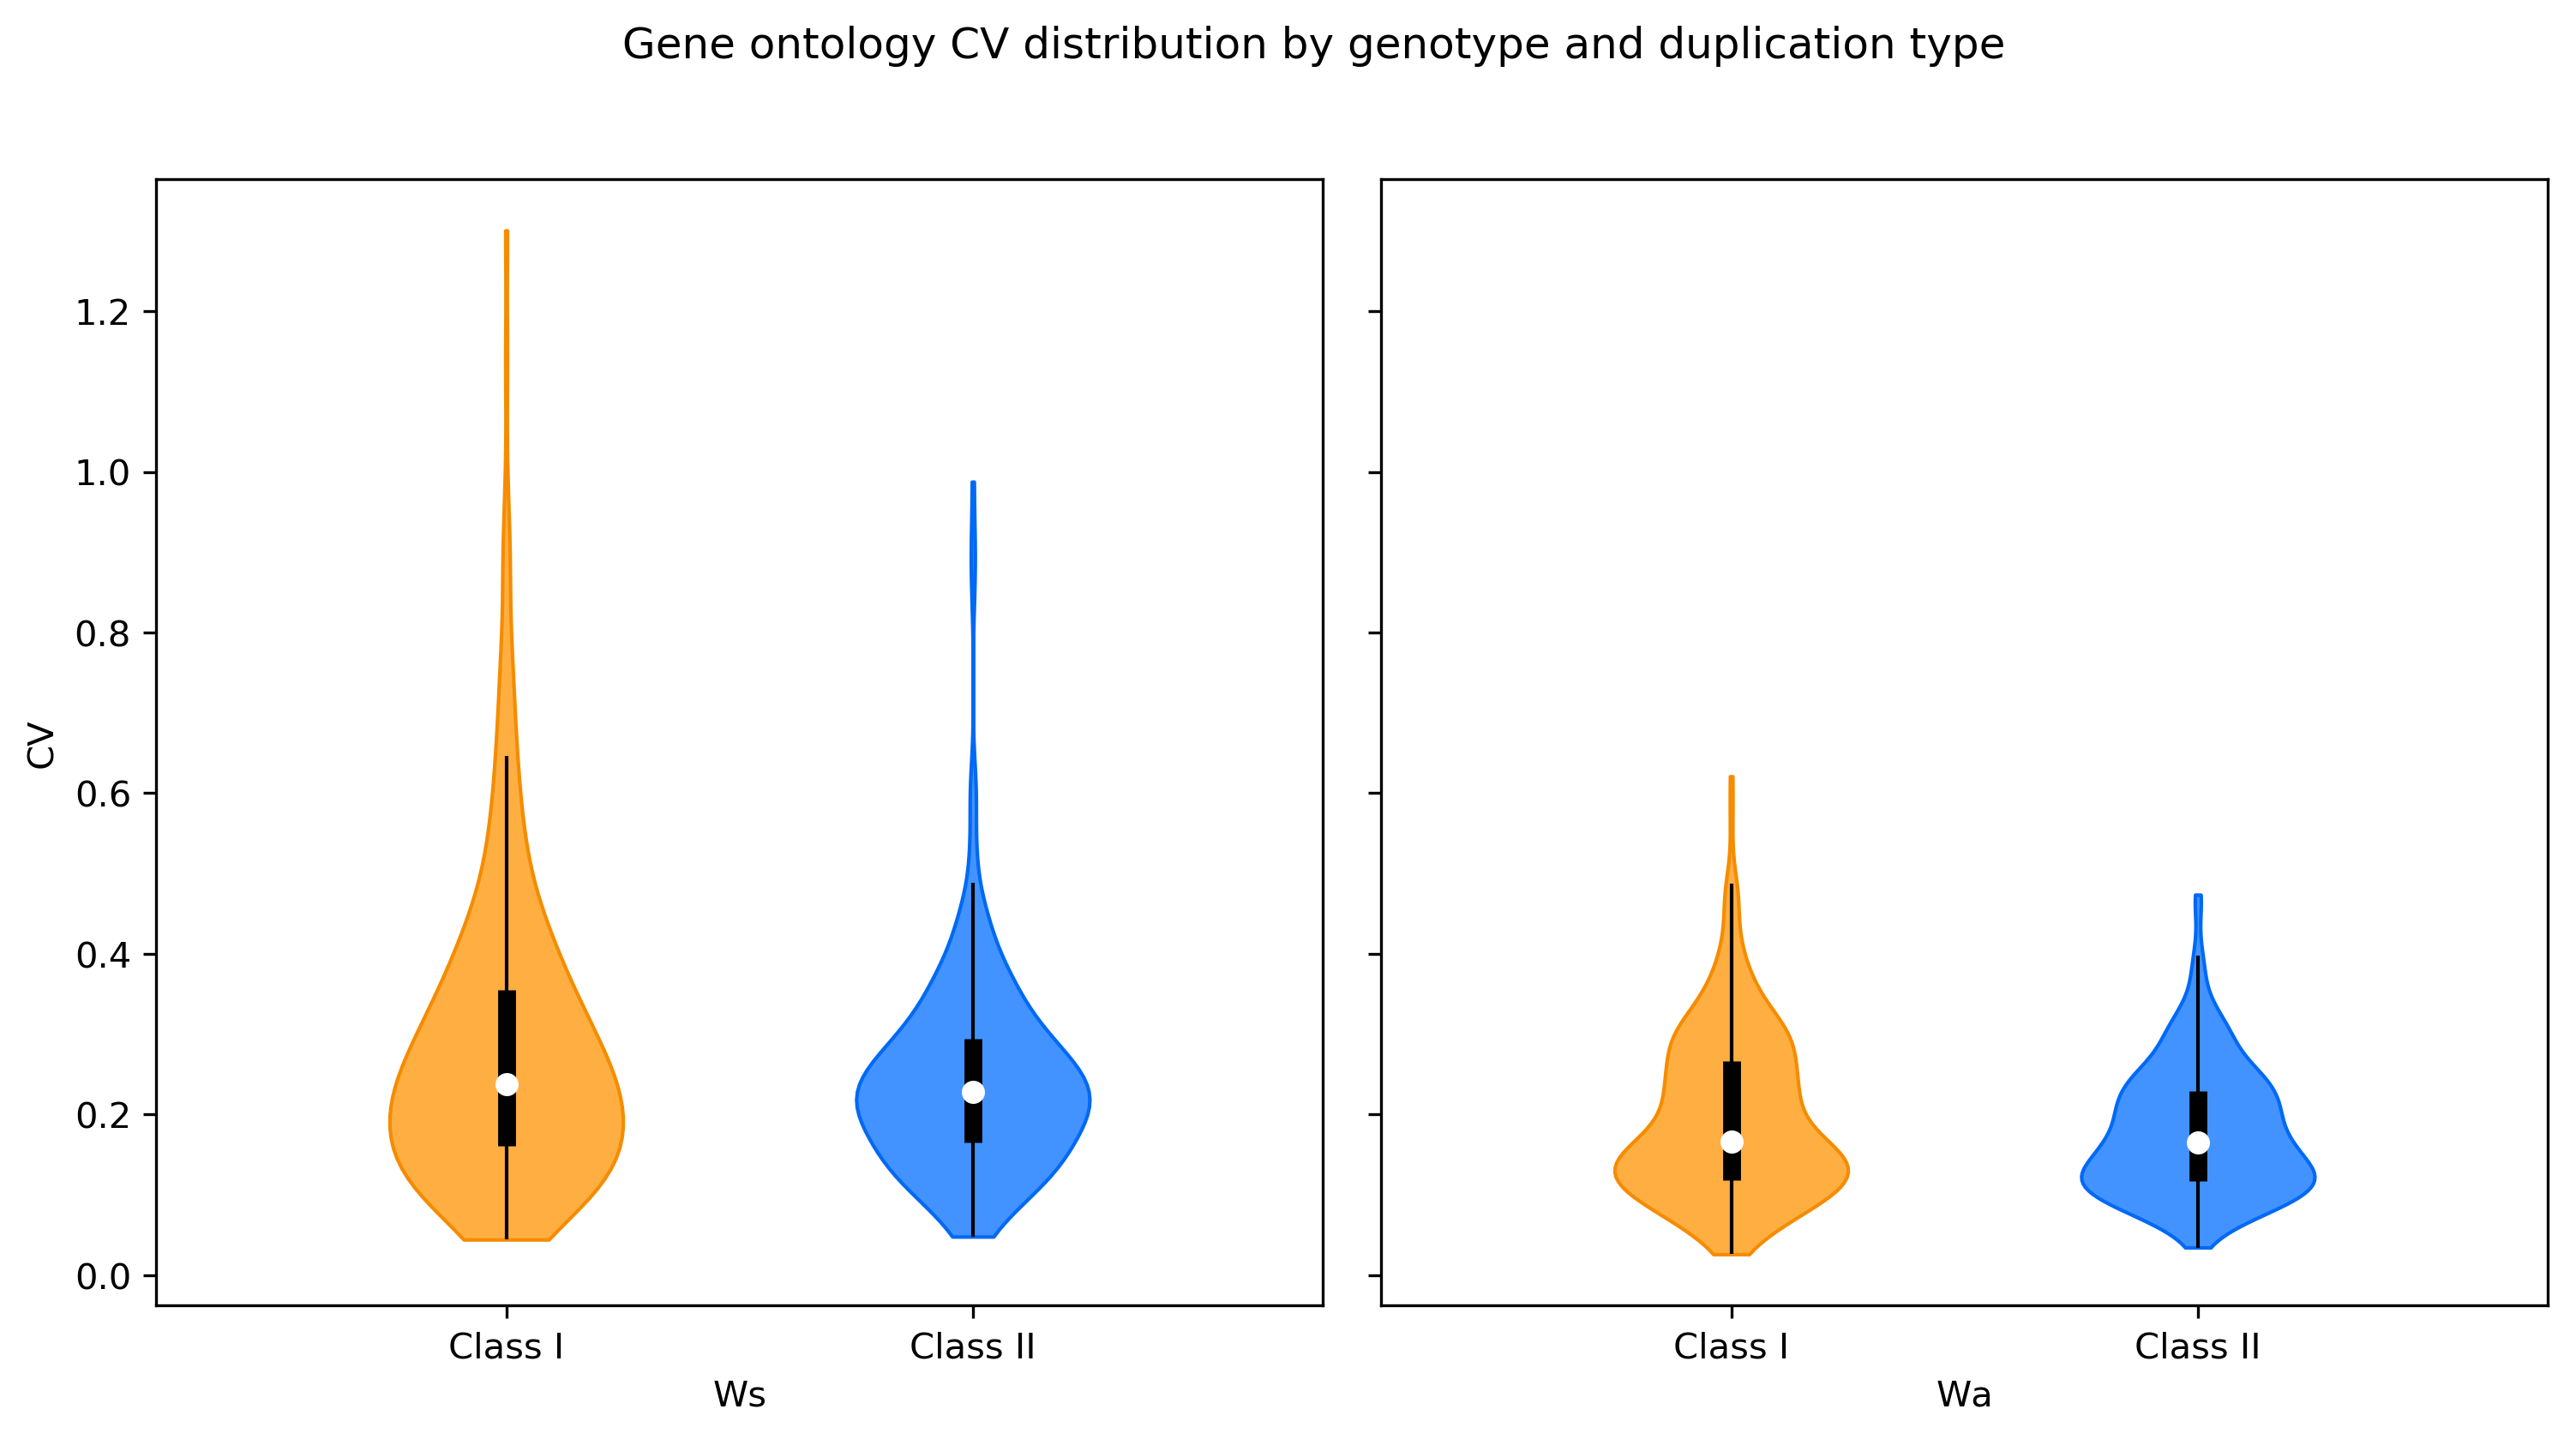

In [12]:
Ws = [Ws_I, Ws_II]
C24 = [C24_I, C24_II]
Wa = [Wa_I, Wa_II]

fig, (ax1, ax3) = plt.subplots(nrows=1, ncols=2, figsize=(12,6), dpi=DPI, sharey=True)

#ax1.set_title('Ws')
ax1.set_ylabel('CV')
parts = ax1.violinplot(
        Ws, showmeans=False, showmedians=False,
        showextrema=False)
ax1.set_xlabel('Ws')
set_class_colors(parts)

ax2.set_title('C24')
parts = ax2.violinplot(
        C24, showmeans=False, showmedians=False,
       showextrema=False)
ax2.set_xlabel('C24')
set_class_colors(parts)

#ax3.set_title('Wa')
parts = ax3.violinplot(
        Wa, showmeans=False, showmedians=False,
        showextrema=False)
ax3.set_xlabel('Wa')
set_class_colors(parts)

for (p, d) in zip([ax1, ax3],[Ws, Wa]):
    for thing in d:
        quartile1, medians, quartile3 = np.percentile(thing, [25, 50, 75])
        whiskers = np.array([
            adjacent_values(thing, quartile1, quartile3)])
        whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

        inds = np.arange(d.index(thing)+1, d.index(thing)+2)
        p.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
        p.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
        p.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)

# set style for the axes
labels = ['Class I', 'Class II']
for ax in [ax1, ax3]:
    set_axis_style(ax, labels)

fig.suptitle("Gene ontology CV distribution by genotype and duplication type")
# fig.text(0.95, 0.05, 'Potter, Song, Doyle, and Coate', 
#         fontsize=50, color='gray',
#         ha='right', va='bottom', alpha=0.5)
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.savefig('figures/GO_violin_PRV.png')

In [13]:
outlier_threshold = 150

ws_file = 'data/Ws_PRV_metab.txt'
c24_file = 'data/C24_PRV_metab.txt'
wa_file = 'data/Wa_PRV_metab.txt'

df_ws=pd.read_csv(ws_file, sep='\t')
df_c24=pd.read_csv(c24_file, sep='\t')
df_wa=pd.read_csv(wa_file, sep='\t')

vals_ws = df_ws.values
vals_c24 = df_c24.values
vals_wa = df_wa.values

classes_ws = np.delete(vals_ws,[1,2,3],axis=1).ravel()
classes_c24 = np.delete(vals_c24,[1,2,3],axis=1).ravel()
classes_wa = np.delete(vals_wa,[1,2,3],axis=1).ravel()

cv_ws = np.delete(vals_ws,[0,1,2],axis=1).ravel()
cv_c24 = np.delete(vals_c24,[0,1,2],axis=1).ravel()
cv_wa = np.delete(vals_wa,[0,1,2],axis=1).ravel()

Ws_I = sorted(np.array([cv_ws[i] for i in range(len(classes_ws)) if (classes_ws[i] == 'I' and cv_ws[i] < outlier_threshold)]))
Ws_II = sorted(np.array([cv_ws[i] for i in range(len(classes_ws)) if (classes_ws[i] == 'II' and cv_ws[i] < outlier_threshold)]))

C24_I = sorted(np.array([cv_c24[i] for i in range(len(classes_c24)) if (classes_c24[i] == 'I' and cv_c24[i] < outlier_threshold)]))
C24_II = sorted(np.array([cv_c24[i] for i in range(len(classes_c24)) if (classes_c24[i] == 'II' and cv_c24[i] < outlier_threshold)]))

Wa_I = sorted(np.array([cv_wa[i] for i in range(len(classes_wa)) if (classes_wa[i] == 'I' and cv_wa[i] < outlier_threshold)]))
Wa_II = sorted(np.array([cv_wa[i] for i in range(len(classes_wa)) if (classes_wa[i] == 'II' and cv_wa[i] < outlier_threshold)]))

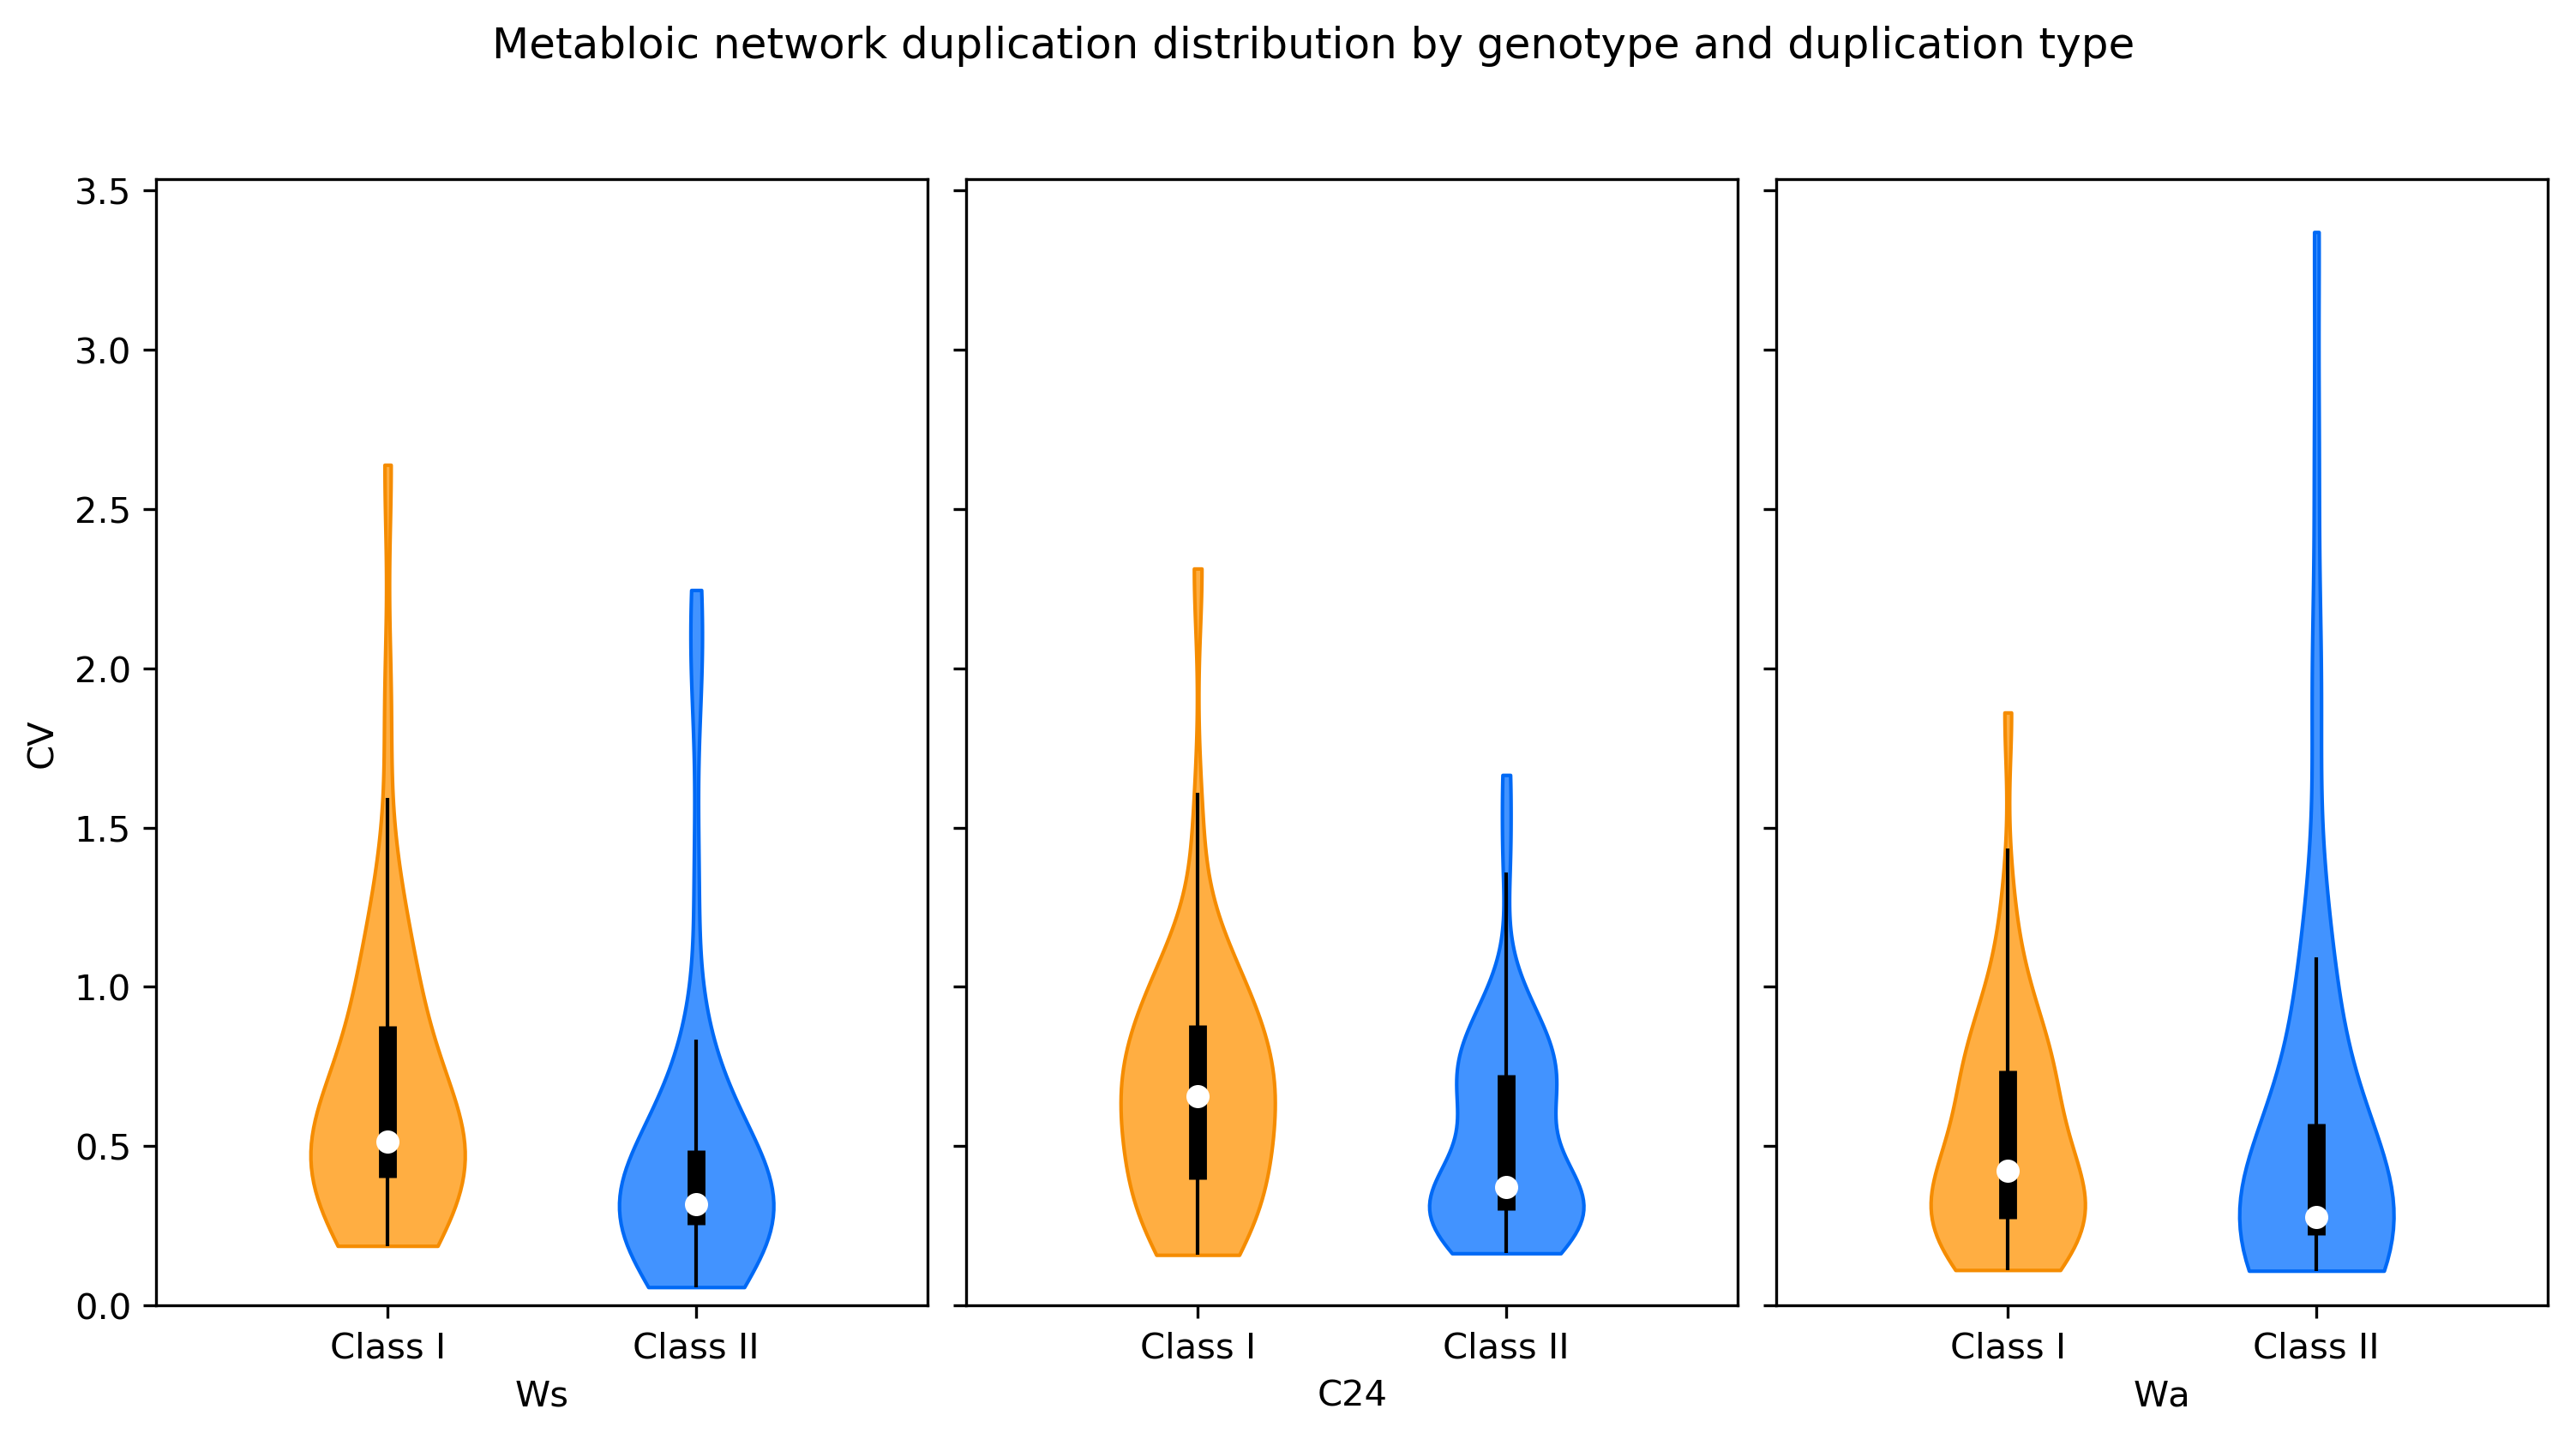

In [14]:
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    # comment the following line for full-length
    ax.set_ylim(0)

Ws = [Ws_I, Ws_II]
C24 = [C24_I, C24_II]
Wa = [Wa_I, Wa_II]

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,6), dpi=DPI, sharey=True)

#ax1.set_title('Ws')
ax1.set_ylabel('CV')
parts = ax1.violinplot(
        Ws, showmeans=False, showmedians=False,
        showextrema=False)
ax1.set_xlabel('Ws')
set_class_colors(parts)

#ax2.set_title('C24')
parts = ax2.violinplot(
        C24, showmeans=False, showmedians=False,
        showextrema=False)
ax2.set_xlabel('C24')
set_class_colors(parts)

#ax3.set_title('Wa')
parts = ax3.violinplot(
        Wa, showmeans=False, showmedians=False,
        showextrema=False)
ax3.set_xlabel('Wa')
set_class_colors(parts)

for (p, d) in zip([ax1, ax2, ax3],[Ws, C24, Wa]):
    for thing in d:
        quartile1, medians, quartile3 = np.percentile(thing, [25, 50, 75])
        whiskers = np.array([
            adjacent_values(thing, quartile1, quartile3)])
        whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]
        
        inds = np.arange(d.index(thing)+1, d.index(thing)+2)
        p.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
        p.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
        p.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)

# set style for the axes
labels = ['Class I', 'Class II']
for ax in [ax1, ax2, ax3]:
    set_axis_style(ax, labels)

fig.suptitle("Metabloic network duplication distribution by genotype and duplication type")
#fig.text(0.95, 0.05, 'Potter, Song, Doyle, and Coate',
#         fontsize=50, color='gray',
#         ha='right', va='bottom', alpha=0.5)
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.savefig('figures/metabolic_violin_PRV.png')